### In this notebook, I directly dropped the columns with null values. And the AUC score increased to 55%

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv("2020_Competition_Training (1).csv")
df_train["train"] = 1
df_test = pd.read_csv("2020_Competition_Holdout .csv")
df_test["train"] = 0
df_test["transportation_issues"] = "NA"
df = pd.concat([df_train, df_test])
df.reset_index(inplace=True)

df.shape #87253 rows with 828 features
#df.drop("person_id_syn", axis=1, inplace=True)
#df= pd.get_dummies(df)
#df.fillna(0,inplace=True)

/Users/zixuanzhang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (80,193) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/zixuanzhang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(87253, 828)

In [4]:
#df.to_csv("merge_data.csv")

In [5]:
df_columns = df.columns.tolist()
df_columns.remove("transportation_issues")

In [29]:
df_train = df[df["train"]==1]
df_train.dropna(axis=1,inplace=True)
df_hold = df[df["train"]==0]

y = df_train["transportation_issues"].values
y = y.astype("int")
x = df_train.drop(["index","person_id_syn","transportation_issues"], axis=1)

x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

/Users/zixuanzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# evaluate pca with logistic regression algorithm for classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# define transform
scaler = MinMaxScaler()
pca = PCA(n_components=60)
# prepare transform on dataset
x_train = scaler.fit_transform(x_train)
x_train = pca.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_test = pca.fit_transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l2", random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)

/Users/zixuanzhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
(y_test==y_pred).mean() #accuracy 86.87%

[[17657   182]
 [ 2899   134]]


0.8523859716366424

ROC_AUC Score:
0.5169891567960314


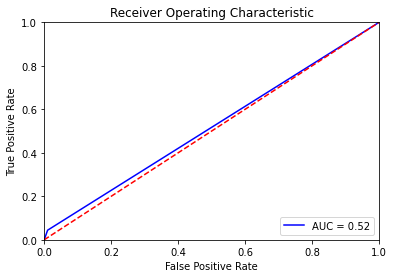

In [33]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print("ROC_AUC Score:")
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()